In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
def significant_corr(df1,df2,a,b):
  import scipy.stats as stats
  if df2.empty:
    df2=df1
  r = stats.pearsonr(df1[a], df2[b])
  if r[1] < 0.1:
    return (True,r[0])
  else:
    return (False,r[1])

def print_significant_corr(df1,df2,a,b):
  import scipy.stats as stats
  if df2.empty:
    df2=df1
  r = stats.pearsonr(df1[a], df2[b])
  if r[1] < 0.1:
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    print('*Statistically significant*')
    print('***********************************************')

In [16]:
ieco_grf_df=pd.read_csv('../iEco_with_Graph_metrics.csv')
ieco_df=pd.read_csv('../PromediosPilares.csv')
grf_df=pd.read_csv('../Tidy_DataFrame.csv')
grf_sin_islas_nd=pd.read_csv('../Gephi_sin_islas/CABA sin islas nodes.csv')
full_ieco_df=pd.read_csv('full_iEco.csv')

ieco_grf_df=pd.concat([ieco_grf_df,grf_df],axis=1)
ieco_grf_df = ieco_grf_df.loc[:,~ieco_grf_df.columns.duplicated()]
full_ieco_df=full_ieco_df.rename({0:1,1:0,5:3,3:5},axis='index')
full_ieco_grf_df=pd.concat([full_ieco_df,grf_df],axis=1)


In [17]:
ieco_df

,Unnamed: 0,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Impact
0,México,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,3.430,2.970000,2.93,3.725455
1,Argentina,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,3.175,2.965000,2.58,3.781818
2,Chile,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,3.205,3.455000,3.11,4.091818
3,Brasil,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,3.460,3.438333,2.74,3.671818
4,España,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,3.365,2.626667,2.84,3.864545
5,Uruguay,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,2.740,3.143333,2.48,4.147576


In [5]:
ieco_df_copy

NameError: name 'ieco_df_copy' is not defined

In [18]:
grf_df

,Ciudad,País,avg strength,weight,Degree,Weighted Degree,Eccentricidad,Clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Core Ratio,Central Point Dominance,Spectral radius
0,CABA,Argentina,3.244633,1.481579,4.385965,14.017544,4.798246,0.148791,6,3,3.355669,0.107392,0.325773,0.960807,0.495614,0.251,1.868
1,CDMX,México,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940,7,4,3.820318,0.050000,0.289320,0.677149,0.421405,0.202,1.910
2,Santiago de Chile,Chile,3.417211,1.462564,3.948718,13.764103,5.041026,0.134037,6,3,3.227544,0.100744,0.338889,0.906814,0.430769,0.525,1.890
3,Montevideo,Uruguay,3.227742,2.749495,7.747475,25.939394,4.479798,0.207747,6,3,3.081116,0.224523,0.360837,1.274519,0.565657,0.179,1.778
4,Madrid,España,3.518387,1.362343,3.790795,12.861925,6.079498,0.120510,8,5,3.783517,0.081917,0.294653,1.141033,0.439331,0.184,1.920
5,Sao Paulo,Brasil,3.430669,1.253704,3.370370,11.694444,6.726852,0.129928,8,4,4.324031,0.078571,0.266719,1.211794,0.421296,0.237,1.983


In [19]:
ieco_grf_df

,Unnamed: 0,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,...,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Core Ratio,Central Point Dominance,Spectral radius,Ciudad,País
0,México,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,...,4,3.820318,0.050000,0.289320,0.677149,0.421405,0.202,1.910,CABA,Argentina
1,Argentina,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,...,3,3.355669,0.107392,0.325773,0.960807,0.495614,0.251,1.868,CDMX,México
2,Chile,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,...,3,3.227544,0.100744,0.338889,0.906814,0.430769,0.525,1.890,Santiago de Chile,Chile
3,Brasil,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,...,4,4.324031,0.078571,0.266719,1.211794,0.421296,0.237,1.983,Montevideo,Uruguay
4,España,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,...,5,3.783517,0.081917,0.294653,1.141033,0.439331,0.184,1.920,Madrid,España
5,Uruguay,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,...,3,3.081116,0.224523,0.360837,1.274519,0.565657,0.179,1.778,Sao Paulo,Brasil


In [20]:
full_ieco_df

,Unnamed: 0,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),...,5.02 Social Progress Index,5.03 Inclusive Development Index,5.04 Population below international poverty line (SDG 1 - No poverty),5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger),5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth),5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),"5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)",5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities),5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities),5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)
1,México,3.90,4.44,3.63,3.81,3.68,3.33,2.47,3.34,4.50,...,3.82,3.08,4.80,4.88,3.34,4.72,4.33,4.520000,4.32,1.71
0,Argentina,3.36,4.22,2.97,2.60,3.30,3.02,2.99,2.86,3.77,...,4.07,3.09,4.97,4.88,3.58,3.94,4.20,4.580000,4.71,2.03
2,Chile,3.90,4.66,4.01,3.40,3.59,3.80,3.94,3.59,4.56,...,4.20,3.29,4.94,4.93,3.32,4.16,4.29,4.840000,4.28,5.00
5,Brasil,3.36,4.25,2.38,3.02,3.56,3.29,2.82,2.98,3.71,...,3.91,2.95,4.61,5.00,3.22,3.26,4.60,4.510000,4.73,2.18
4,España,4.12,4.48,4.39,4.17,3.84,4.00,3.20,3.31,4.46,...,4.50,3.27,4.92,5.00,3.82,2.57,4.56,4.900000,4.82,1.68
3,Uruguay,3.46,4.58,3.81,3.14,3.25,3.88,3.94,3.84,4.10,...,4.11,3.31,4.99,5.00,3.67,4.02,4.87,4.643333,4.87,4.32


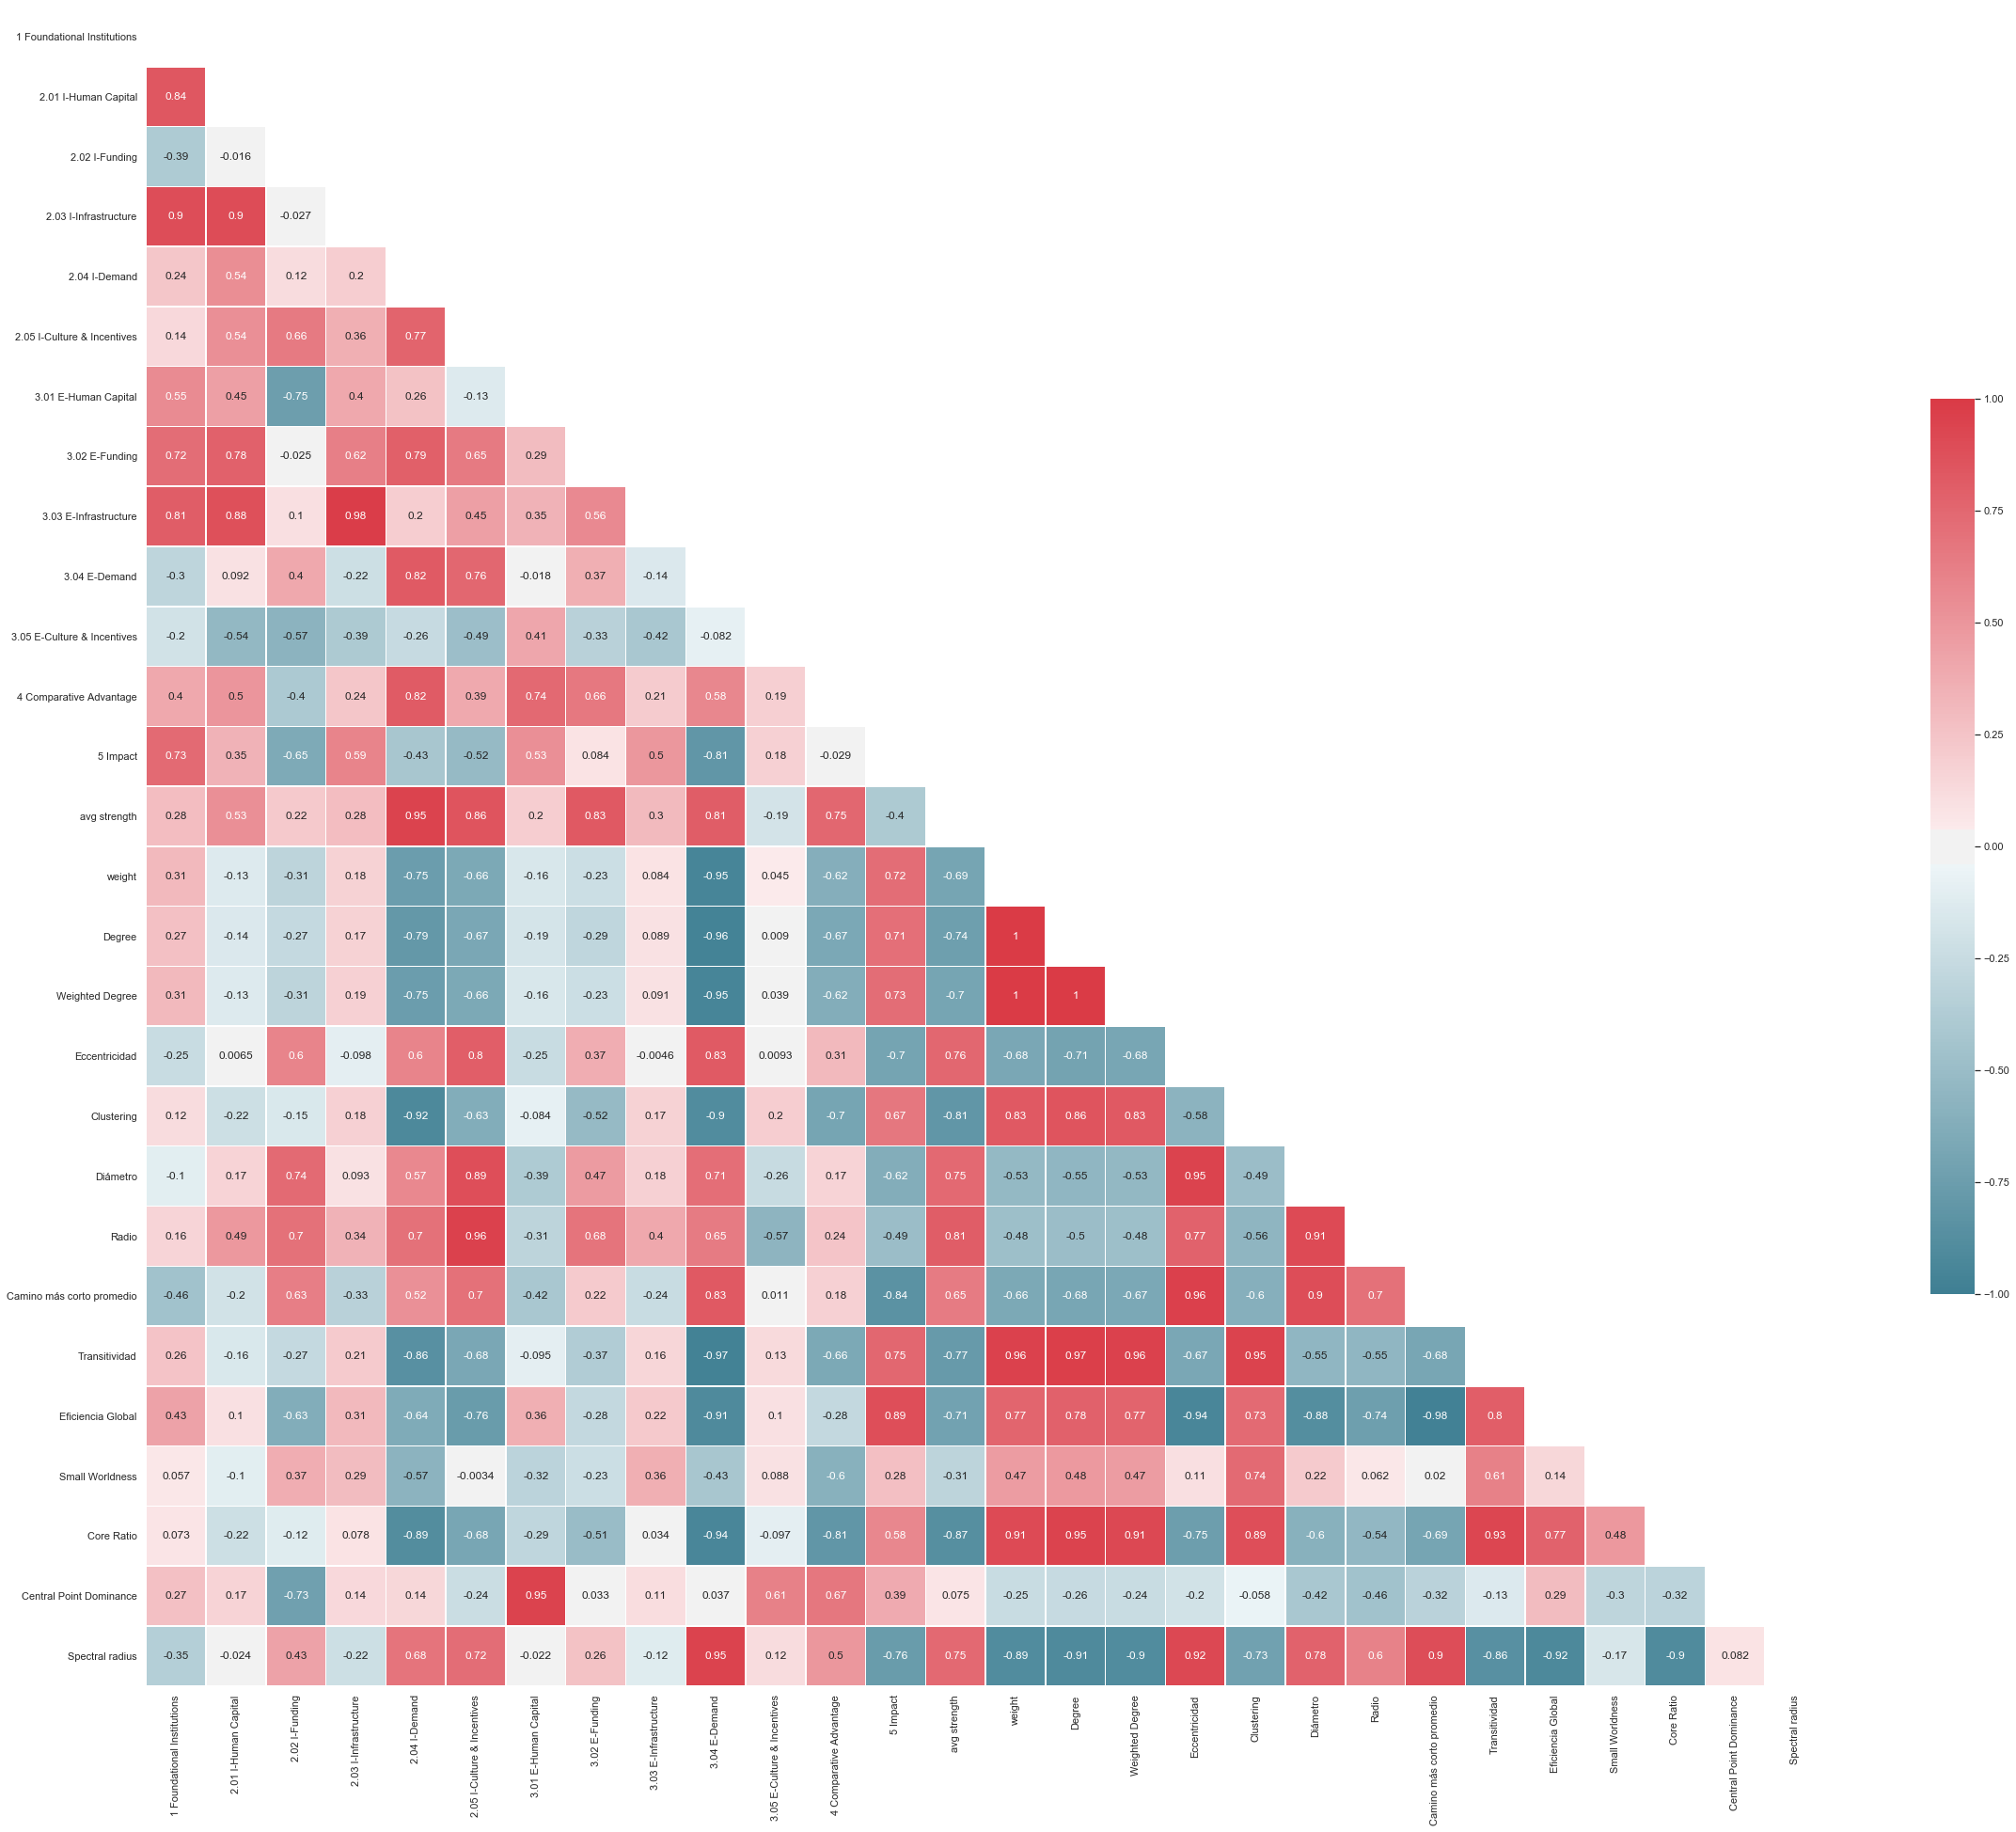

In [21]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(ieco_grf_df.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ieco_grf_df.corr(), mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
#Pilars and Graph Metrics

list1=list(ieco_df.keys())
list2=list(grf_df.keys())

list1.remove('Unnamed: 0')
list2.remove('Ciudad')
list2.remove('País')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))
            else:
                negative_pairs.append((key1,key2))

In [23]:
for keys in positive_pairs:
    print_significant_corr(ieco_grf_df,ieco_grf_df,keys[0],keys[1])

Correlation between:  2.02 I-Funding   and   Diámetro
**********************************************
Pearson Correlation: 0.7385065695777545, p-value: 0.09362791589032411
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   avg strength
**********************************************
Pearson Correlation: 0.952116314101418, p-value: 0.00338437607108655
*Statistically significant*
***********************************************
Correlation between:  2.05 I-Culture & Incentives   and   avg strength
**********************************************
Pearson Correlation: 0.8576669176387272, p-value: 0.02894631744307349
*Statistically significant*
***********************************************
Correlation between:  2.05 I-Culture & Incentives   and   Eccentricidad
**********************************************
Pearson Correlation: 0.8042285278880069, p-value: 0.05373808928218256
*Statistically significant*
***********************

In [24]:
for keys in negative_pairs:
    print_significant_corr(ieco_grf_df,ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04 I-Demand   and   weight
**********************************************
Pearson Correlation: -0.7513026741395321, p-value: 0.08508453028112797
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Degree
**********************************************
Pearson Correlation: -0.7930354359599853, p-value: 0.059818901855709296
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Weighted Degree
**********************************************
Pearson Correlation: -0.7540324234088823, p-value: 0.08330954791577455
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Clustering
**********************************************
Pearson Correlation: -0.9174944429171862, p-value: 0.00992993587365419
*Statistically significant*
***********************************************
Correl

In [36]:
# I-Funding, E-funding with Graph metrics
#list1=list(full_ieco_df.keys())
list1=['2.04a Government procurement of advanced technology (GCI)','2.04b University-industry research collaborations (GII)','2.04c Trade, Competition & Market scale (GII)','3.04a Buyer sophistication (GCI 4.0)','3.04b Domestic Market Scale (GII)']
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs_2=[]
negative_pairs_2=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(full_ieco_grf_df,full_ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs_2.append((key1,key2))
            else:
                negative_pairs_2.append((key1,key2))

In [26]:
for keys in positive_pairs_2:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04b University-industry research collaborations (GII)   and   avg strength
**********************************************
Pearson Correlation: 0.9057240787070973, p-value: 0.012912964197428016
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Spectral radius
**********************************************
Pearson Correlation: 0.7928267560324674, p-value: 0.059935113706115976
*Statistically significant*
***********************************************
Correlation between:  2.04c Trade, Competition & Market scale (GII)   and   avg strength
**********************************************
Pearson Correlation: 0.9567036039358547, p-value: 0.0027712856343463715
*Statistically significant*
***********************************************
Correlation between:  2.04c Trade, Competition & Market scale (GII)   and   Spectral radius
***********************************

In [27]:
for keys in negative_pairs_2:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04b University-industry research collaborations (GII)   and   weight
**********************************************
Pearson Correlation: -0.8026827654539166, p-value: 0.05455995298570256
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Degree
**********************************************
Pearson Correlation: -0.8537047923796843, p-value: 0.03053790559238056
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Weighted Degree
**********************************************
Pearson Correlation: -0.8072291739267887, p-value: 0.05215914812809964
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Clustering
*********************************

In [37]:
#Comparative Advantage and Graph Metrics

list1=['4.01 State of cluster development (GCI 4.0)', '4.02 Country capacity to attract and retain talent']
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs_3=[]
negative_pairs_3=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(full_ieco_grf_df,full_ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs_3.append((key1,key2))
            else:
                negative_pairs_3.append((key1,key2))

In [38]:
for keys in positive_pairs_3:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  4.01 State of cluster development (GCI 4.0)   and   avg strength
**********************************************
Pearson Correlation: 0.942248635724273, p-value: 0.004906523358795622
*Statistically significant*
***********************************************
Correlation between:  4.01 State of cluster development (GCI 4.0)   and   Diámetro
**********************************************
Pearson Correlation: 0.7743772113199459, p-value: 0.0706157276167885
*Statistically significant*
***********************************************
Correlation between:  4.01 State of cluster development (GCI 4.0)   and   Radio
**********************************************
Pearson Correlation: 0.8898733242623675, p-value: 0.017524025250165564
*Statistically significant*
***********************************************
Correlation between:  4.02 Country capacity to attract and retain talent   and   Central Point Dominance
**********************************************
Pearson Correlation

In [39]:
for keys in negative_pairs_3:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  4.01 State of cluster development (GCI 4.0)   and   Clustering
**********************************************
Pearson Correlation: -0.8144599256630701, p-value: 0.04844405919111323
*Statistically significant*
***********************************************
Correlation between:  4.01 State of cluster development (GCI 4.0)   and   Eficiencia Global
**********************************************
Pearson Correlation: -0.7331894211577772, p-value: 0.09728498707386624
*Statistically significant*
***********************************************
Correlation between:  4.01 State of cluster development (GCI 4.0)   and   Core Ratio
**********************************************
Pearson Correlation: -0.7418050455138055, p-value: 0.09139071564505222
*Statistically significant*
***********************************************


In [35]:
#Impact and Graph Metrics

list1=list(full_ieco_df.keys())[-9:] 
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs_3=[]
negative_pairs_3=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(full_ieco_grf_df,full_ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs_3.append((key1,key2))
            else:
                negative_pairs_3.append((key1,key2))

In [30]:
for keys in positive_pairs_3:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  5.03 Inclusive Development Index   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.7507052737497485, p-value: 0.08547522386457787
*Statistically significant*
***********************************************
Correlation between:  5.04 Population below international poverty line (SDG 1 - No poverty)   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.8524436013503677, p-value: 0.031052971497648834
*Statistically significant*
***********************************************
Correlation between:  5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)   and   Small Worldness
**********************************************
Pearson Correlation: 0.8859378118403944, p-value: 0.0187732891942125
*Statistically significant*
***********************************************
Correlation between:  5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure) 

In [31]:
for keys in negative_pairs_3:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  5.03 Inclusive Development Index   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.7636868379565528, p-value: 0.07716754029040031
*Statistically significant*
***********************************************
Correlation between:  5.04 Population below international poverty line (SDG 1 - No poverty)   and   Eccentricidad
**********************************************
Pearson Correlation: -0.8546314717467908, p-value: 0.0301620489856016
*Statistically significant*
***********************************************
Correlation between:  5.04 Population below international poverty line (SDG 1 - No poverty)   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.9180526220966121, p-value: 0.009797905523802828
*Statistically significant*
***********************************************
Correlation between:  5.04 Population below international poverty line (SDG 1 - No povert

## Visualizacion para Graficas Sin Islas

In [46]:
grf_sin_islas_nd=grf_sin_islas_nd.drop('indegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('outdegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('weighted indegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('weighted outdegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('timeset',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('Id',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('modularity_class',axis=1)

grf_sin_islas_nd

KeyError: "['indegree'] not found in axis"

In [ ]:
num_sin_islas=grf_sin_islas_nd.drop('Label',axis=1)
num_sin_islas=num_sin_islas.drop('d0',axis=1)
num_sin_islas

In [ ]:
from sklearn.preprocessing import StandardScaler

#column_maxes = num_sin_islas.max()
#normalized_sin_islas = num_sin_islas / column_maxes

X=num_sin_islas.to_numpy()

normalized_sin_islas= StandardScaler().fit_transform(X)

normalized_sin_islas

In [47]:
#normalized_sin_islas=normalized_sin_islas.drop('Degree',axis=1)
#normalized_sin_islas=normalized_sin_islas.drop('Weighted Degree',axis=1)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(normalized_sin_islas)

kmeans.labels_

array([0, 4, 2, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 2, 3, 0, 2, 2, 3, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 3, 2,
       0, 0, 0, 0, 4, 3, 3, 2, 2, 3, 0, 2, 0, 3, 0, 2, 2, 0, 3, 3, 1, 3,
       1, 2, 0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 4, 1,
       2, 1, 3], dtype=int32)

In [44]:
def by_label(labels,data):
    if len(labels)!= len(data):
        return None
    label_dict={}
    for i in range(len(labels)):
        if labels[i] in label_dict.keys():
            label_dict[labels[i]]= np.concatenate([label_dict[labels[i]],np.array([data[i]])],axis=0)
        else:
            label_dict[labels[i]]= [data[i]]
    return label_dict


In [45]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
prin_comp=pca.fit_transform(normalized_sin_islas)

labeled_prin_comp=by_label(grf_sin_islas_nd['d0'].values,prin_comp)

In [ ]:
print(pca.components_)
print(pca.explained_variance_ratio_)
pca.noise_variance_

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(prin_comp)

kmeans.labels_

In [ ]:
'''For 2d Implementations'''

from matplotlib import pyplot as plt
plt.scatter(labeled_prin_comp['Habilitador'][:,0], labeled_prin_comp['Habilitador'][:,1],color='g')
plt.scatter(labeled_prin_comp['Articulador'][:,0], labeled_prin_comp['Articulador'][:,1],color='b')
plt.scatter(labeled_prin_comp['Vinculador'][:,0], labeled_prin_comp['Vinculador'][:,1],color='r')
plt.scatter(labeled_prin_comp['Generador de conocimiento'][:,0], labeled_prin_comp['Generador de conocimiento'][:,1],color='b')
plt.scatter(labeled_prin_comp['Promotor'][:,0], labeled_prin_comp['Promotor'][:,1],color='m')
plt.scatter(labeled_prin_comp['Comunidad'][:,0], labeled_prin_comp['Comunidad'][:,1],color='c')

plt.show()

In [ ]:
''' For 3d Implementations'''
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(labeled_prin_comp['Habilitador'][:,0], labeled_prin_comp['Habilitador'][:,1],labeled_prin_comp['Habilitador'][:,2],color='g')
ax.scatter(labeled_prin_comp['Articulador'][:,0], labeled_prin_comp['Articulador'][:,1],labeled_prin_comp['Articulador'][:,2],color='b')
ax.scatter(labeled_prin_comp['Vinculador'][:,0], labeled_prin_comp['Vinculador'][:,1],labeled_prin_comp['Vinculador'][:,2],color='r')
ax.scatter(labeled_prin_comp['Generador de conocimiento'][:,0], labeled_prin_comp['Generador de conocimiento'][:,1],labeled_prin_comp['Generador de conocimiento'][:,2],color='b')
ax.scatter(labeled_prin_comp['Promotor'][:,0], labeled_prin_comp['Promotor'][:,1],labeled_prin_comp['Promotor'][:,2],color='m')
ax.scatter(labeled_prin_comp['Comunidad'][:,0], labeled_prin_comp['Comunidad'][:,1],labeled_prin_comp['Comunidad'][:,2],color='c')

plt.show()

In [ ]:
from sklearn.manifold import TSNE
sin_islas_tsne = TSNE(n_components=2).fit_transform(normalized_sin_islas)
labeled_tsne=by_label(grf_sin_islas_nd['d0'].values,sin_islas_tsne)

In [ ]:
'''For 2d Implementations'''

from matplotlib import pyplot as plt
plt.scatter(labeled_tsne['Habilitador'][:,0], labeled_tsne['Habilitador'][:,1],color='g')
plt.scatter(labeled_tsne['Articulador'][:,0], labeled_tsne['Articulador'][:,1],color='b')
plt.scatter(labeled_tsne['Vinculador'][:,0], labeled_tsne['Vinculador'][:,1],color='r')
plt.scatter(labeled_tsne['Generador de conocimiento'][:,0], labeled_tsne['Generador de conocimiento'][:,1],color='b')
plt.scatter(labeled_tsne['Promotor'][:,0], labeled_tsne['Promotor'][:,1],color='m')
plt.scatter(labeled_tsne['Comunidad'][:,0], labeled_tsne['Comunidad'][:,1],color='c')

plt.show()

## Visualizacion para Graficas Normales

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



def lin_reg_p_val(reg,X,y):
    '''
    Esta función busca el p-value entre
    
    - X : np.array
    - y : vector de datos
    
    Es decir, mide la correlación entre un conjunto de puntos X 
    determinado por una pareja de variables y un cnjunto de valores y.
    
    Inputs : specified above
    Output : p-value(X,y)
    '''
    
    # predice el np.array X usando modelo lineal, y suma las distancias al cuadrado de esa predicción hacia y
    # luego divide entre  (X.shape[0] - X.shape[1])= (no.columnas, no.filas)
    sse = np.sum((reg.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    
    if isinstance(sse, float):  
        
        # si sse es un valor decimal, entonces forma se, una matriz (np.array) que al cuadrado
        # es igual a diag( sse * (X^T * X)^-1 ) 
        
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])  
        
    else: 
        # si sse no es un valor decimal sino un np.array, entonces se forma se, una lista tal que
        # por cada columna i, el valor se[i]^2 = diag( sse[i] * (X^T * X)^-1 ) 
        
        se = np.array([np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X)))) for i in range(sse.shape[0])])
    
    # con estos dos últimas líneas, obtiene el p-value entre 
    # el conjunto de valores X y el conjunto de valores y
    t = reg.coef_ / se
    p = 2 * (1 - stats.t.cdf(np.abs(t), y.shape[0] - X.shape[1]))
    return p

def plot_linear_model(reg,X,y,key1,key2,predict):
    '''
    This function plots the linear modeling of a vector of variables y in terms of 
    a set of points X, determined by 2 data vectors. 
    
    Inputs:
    - reg :     regression model 
    - X :       a set of points representing some data vectors.
    - y :       data which is to be predicted from the other data vectors
    - key1 :    sring for axis label -> predicting data
    - key2 :    sring for axis label -> predicting data
    - predict : string for axis label -> predicted data
    
    Outputs: 
    None, and a ~very nice~ 3D plot showing how good 
    data collection X might be in predicting linearly data vector y.
    '''
    
    ax = plt.axes(projection='3d')      #we are about to do a 3D projection
    a = np.linspace(1, 5, 30)         
    b = np.linspace(1, 5, 30)
    
    A,B = np.meshgrid(a,b)              #we form a grid based on a (30 equidistant values from 1 to 5) and b (x2)
    C = A*reg.coef_[0] + B*reg.coef_[1] + reg.intercept_   # plane which depicts the linear approximation of y by X
    
    
    ax.scatter3D(X[:,0], X[:,1], y, cmap='Greens')         # we scatter X information in Green
    ax.contour3D(A, B, C, 50, cmap='binary')               # we plot the 3D contour of the linear approximation
    
    
    ax.set_title('Linear Model')                           # Title of plot
    ax.set_xlabel(key1, fontsize=9)                                    # Coordinates labeling
    ax.set_ylabel(key2, fontsize=9)
    ax.set_zlabel(predict, fontsize=9)
    plt.xlim((1,5))
    plt.ylim((1,5))
    plt.show()                                             #pull down the curtains!

In [ ]:
ieco_key_list=list(ieco_df.keys())
ieco_key_list.remove('Unnamed: 0')
ieco_key_list.remove('4 Comparative Advantage')
ieco_key_list.remove('5 Impact')

ieco_key_predictors=['4 Comparative Advantage','5 Impact']

grf_key_list=list(grf_df.keys())
grf_key_list.remove('Ciudad')
grf_key_list.remove('País')

for key1 in ieco_key_list:
    for key2 in ieco_key_list:
        if key1 != key2:
            for key3 in ieco_key_list:
                if key3 !=key1 and key3 !=key2:
                    for predict in ieco_key_predictors:
                        X=np.concatenate([ieco_df[key1].to_numpy(),ieco_df[key2].to_numpy(),ieco_df[key3].to_numpy()],axis=0)
                        X=X.reshape(6,3)
                        y=ieco_df[predict].to_numpy()
                        reg=LinearRegression().fit(X,y)
                        p=lin_reg_p_val(reg,X,y)
                        if p[0][0]<.05 and p[0][1]<.05 and p[0][2]<.05 and reg.score(X,y)>.9:
                            print(key1,key2,key3,predict)
                            print('Regression Score: ' + str(reg.score(X,y)) + ' p-value: ' + str(p) )
                            print('Regression Coefficients: ' + str(reg.coef_) )


In [ ]:
for key1 in ieco_key_list:
    for key2 in ieco_key_list:
        if key1 != key2:
            for predict in ieco_key_predictors:
                X=np.concatenate([ieco_df[key1].to_numpy(),ieco_df[key2].to_numpy()],axis=0)
                X=X.reshape(6,2)
                y=ieco_df[predict].to_numpy()
                reg=LinearRegression().fit(X,y)
                p=lin_reg_p_val(reg,X,y)
                if p[0][0]<.05 and p[0][1]<.05 and reg.score(X,y)>.8:
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Predictor metrics: '+key1+', '+key2)
                    print('Predicted: '+predict)
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Regression Score: ' + str(reg.score(X,y)) + ', p-value: ' + str(p) )
                    print('Regression Coefficients: ' + str(reg.coef_) )
                    print('Intercept: ' + str(reg.intercept_))
                    plot_linear_model(reg,X,y,key1,key2,predict)
                    print('')
                    print('')
                    print('')

In [ ]:
grf_key_list=list(grf_df.keys())
grf_key_list.remove('Ciudad')
grf_key_list.remove('País')

ieco_key_predictors=['4 Comparative Advantage','5 Impact']

for key1 in grf_key_list:
    for key2 in grf_key_list:
        if key1 != key2:
            for predict in ieco_key_predictors:
                X=np.concatenate([ieco_grf_df[key1].to_numpy(),ieco_grf_df[key2].to_numpy()],axis=0)
                X=X.reshape(6,2)
                y=ieco_grf_df[predict].to_numpy()
                reg=LinearRegression().fit(X,y)
                p=lin_reg_p_val(reg,X,y)
                if p[0][0]<.05 and p[0][1]<.05 and reg.score(X,y)>.8:
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Predictor metrics: '+key1+', '+key2)
                    print('Predicted: '+predict)
                    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
                    print('Regression Score: ' + str(reg.score(X,y)) + ', p-value: ' + str(p) )
                    print('Regression Coefficients: ' + str(reg.coef_) )
                    print('Intercept: ' + str(reg.intercept_))
                    plot_linear_model(reg,X,y,key1,key2,predict)
                    print('')
                    print('')
                    print('')
